# Projeto - COMO FUNCIONA O KNN (K - NEAREST NEIGHBORS) - Victor Tintel

<p>Vou ver na prática como é o funcionamento do algoritmo KNN para criação de modelos de Machine Learning


In [2]:
# Importando os pacotes a serem utilizados

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [4]:
# Criando um DataFrame somente para ilustrar a explicação
dados = {
    'A' : [1,1.5,2,1.5,-1,-0.5,0,-0.5],    
    'B' : [1,1.5,1,0.5,-1,-0.5,-1,-1.5],    
    'Y' : [1,1,1,1,0,0,0,0]    
}

df = pd.DataFrame(dados)


dados = {
    'A' : [2.5, 1.7, 0.5, -1, -1],    
    'B' : [1.8, 1, 0, 0, -1.5]    
}

df_previsao = pd.DataFrame(dados)

In [6]:
df.head()

,A,B,Y
0,1.0,1.0,1
1,1.5,1.5,1
2,2.0,1.0,1
3,1.5,0.5,1
4,-1.0,-1.0,0


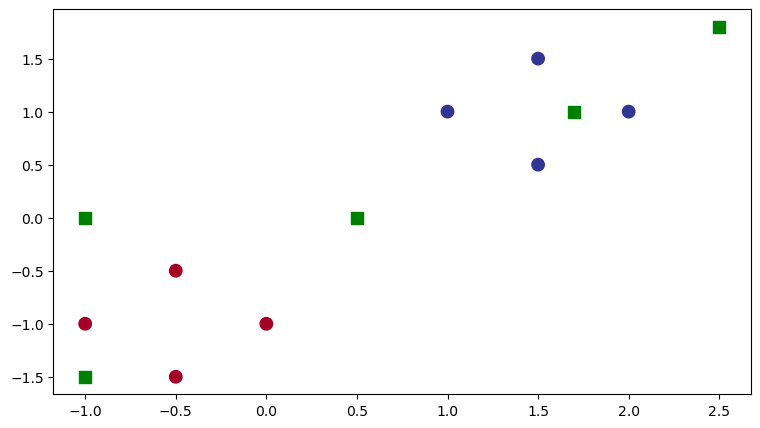

In [10]:
# Criando um plot para visualizar as informações

plt.figure(figsize=(9,5)) 
plt.scatter(x = df.A,
           y = df.B,
           c = df.Y,
           s = 80, 
           cmap = 'RdYlBu')

plt.scatter(x = df_previsao.A,
           y = df_previsao.B,
           c = 'g',
           s = 80,
           marker = 's')

plt.show()

In [12]:
# Vamos utilizar o Dataset Iris para criarmos um cenário Real 

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
# Vamos criar o DataFrame com os dados do Dataset Iris

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# Vamos separar e utilizar somente 2 colunas e a variável alvo
# Não vou utilizar o valor TARGET = 0, apenas o valor 1 e o valor 2

df1 = df.loc[df.target.isin([1,2]), ['petal length (cm)','petal width (cm)','target']]
df1

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [20]:
# Vamos separar as variáveis predioras da variável alvo

x = df1[['petal length (cm)','petal width (cm)']]
y = df1.target

In [24]:
x.head()

,petal length (cm),petal width (cm)
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [26]:
# Vamos separar os dados em Treino e Teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42)

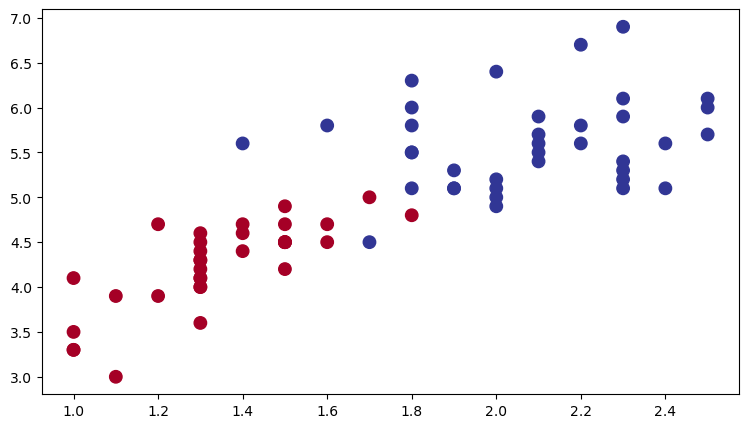

In [30]:
plt.figure(figsize=(9,5)) 
plt.scatter(x = x_treino['petal width (cm)'],
           y = x_treino['petal length (cm)'],
           c = y_treino,
           s = 80, 
           cmap = 'RdYlBu')

plt.xlim = (0.9,2.6)
plt.ylim = (3, 7)
plt.xticks = ([1,1.5,2,2.5])
plt.yticks = ([3, 4, 5, 6, 7])

plt.show()

In [32]:
# Agora vamos criar nosso modelo utilizando KNN

In [34]:
# Criando o modelo
clf = KNeighborsClassifier(n_neighbors = 5)

# Treinando o modelo
clf = clf.fit(x_treino, y_treino)

# Gerando as previsões
previsao = clf.predict(x_teste)

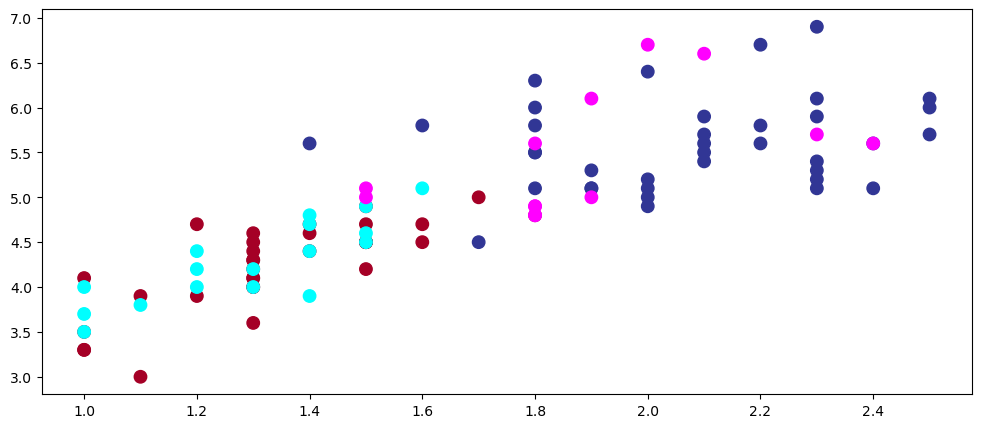

In [36]:
# Criando o gráfico com os dados de Treino e de Teste
plt.figure(figsize=(12,5))

plt.scatter(x = x_treino['petal width (cm)'],
           y = x_treino['petal length (cm)'],
           c = y_treino,
           s = 80,
           cmap = 'RdYlBu')

plt.scatter(x = x_teste['petal width (cm)'],
           y = x_teste['petal length (cm)'],
           c = y_teste,
           s = 80,
           cmap = 'cool')

plt.xlim = (0.9,2.6)
plt.ylim = (3, 7)
plt.xticks = ([1,1.5,2,2.5])
plt.yticks = ([3, 4, 5, 6, 7])


plt.show()

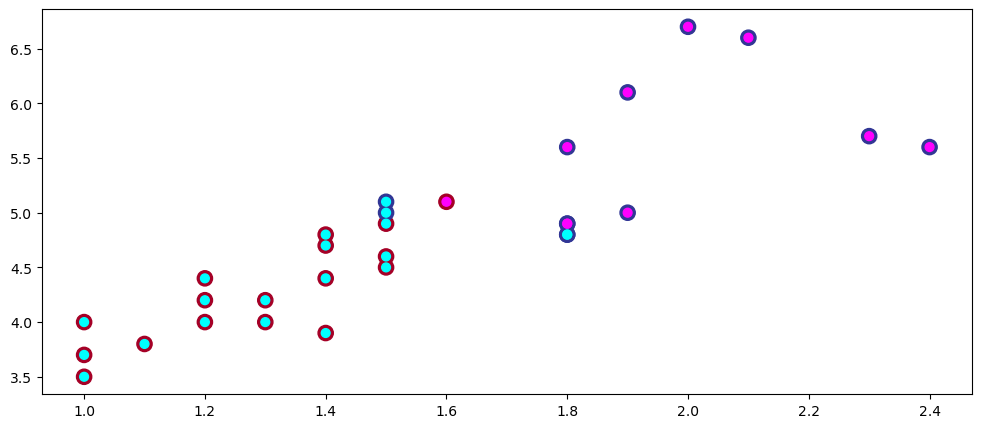

In [38]:
# Criando o gráfico com os dados de Teste e os dados Previstos
plt.figure(figsize=(12,5))

plt.scatter(x = x_teste['petal width (cm)'],
           y = x_teste['petal length (cm)'],
           c = y_teste,
           s = 120, 
           cmap = 'RdYlBu')

plt.scatter(x = x_teste['petal width (cm)'],
           y = x_teste['petal length (cm)'],
           c = previsao,
           s = 40, 
           cmap = 'cool')

plt.xlim = (0.9,2.6)
plt.ylim = (3, 7)
plt.xticks = ([1,1.5,2,2.5])
plt.yticks = ([3, 4, 5, 6, 7])


plt.show()